In [263]:
#import nltk
#import re
#import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt

In [264]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances, euclidean_distances
from scipy.cluster.hierarchy import linkage, dendrogram

In [265]:
vectorizer = TfidfVectorizer(use_idf=False)

In [266]:
%store -r

## Functions

In [267]:
def string_unifier (speeches):    
    result = []
    for speech in speeches:
        output =  " ".join(speech)
        result.append(output)
    return result

In [268]:
def dendrogram_plotter (author_characters, distances_metric, n_chart, n_labels):
    names = list(author_characters.keys())
    speeches = list(author_characters.values())
    speeches = string_unifier(speeches)
    matrix = vectorizer.fit_transform(speeches)
    similarity = distances_metric(matrix)
    linkages = linkage(similarity, 'ward')
    plt.figure(figsize=(n_chart, n_chart))
    dendrogram(linkages, labels = names, orientation = "right", leaf_font_size = n_labels)
    plt.tick_params(axis = 'both', bottom = False, labelbottom = False)
    plt.show()

In [269]:
def dendrogram_plotter_color (author_characters, distances_metric, n_chart, n_labels, color_dict):
    names = list(author_characters.keys())
    speeches = list(author_characters.values())
    speeches = string_unifier(speeches)
    matrix = vectorizer.fit_transform(speeches)
    similarity = distances_metric(matrix)
    linkages = linkage(similarity, 'ward')
    plt.figure(figsize=(n_chart, n_chart))
    dendrogram(linkages, labels = names, orientation = "right", leaf_font_size = n_labels)
    labels = plt.gca().get_yticklabels()
    for label in labels:
        label.set_color(color_dict[label.get_text()])
    plt.tick_params(axis = 'both', bottom = False, labelbottom = False)
    plt.show()

In [270]:
def color_assigner (author_characters, color):
    result = {}
    for char in author_characters:
        result[char] = color
    return result

# English Authors

## Oscar Wilde

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  import sys


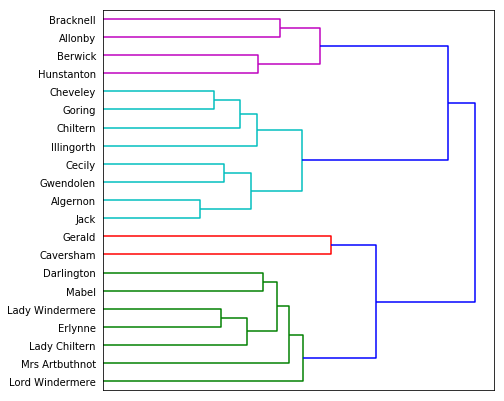

In [271]:
dendrogram_plotter(wilde_characters, euclidean_distances, 7, 10)

## George Bernard Shaw

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  import sys


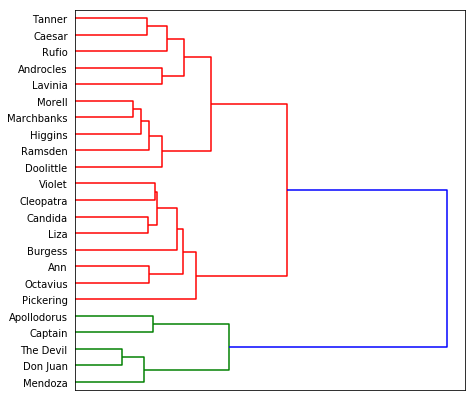

In [145]:
dendrogram_plotter(shaw_characters, euclidean_distances, 7, 10)

## Ben Jonson

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  import sys


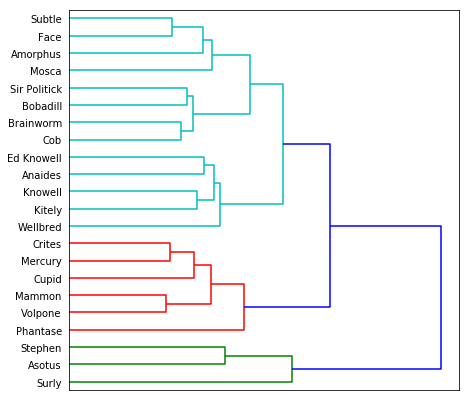

In [151]:
dendrogram_plotter(jonson_characters, euclidean_distances, 7, 10)

## William Shakespeare

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  import sys


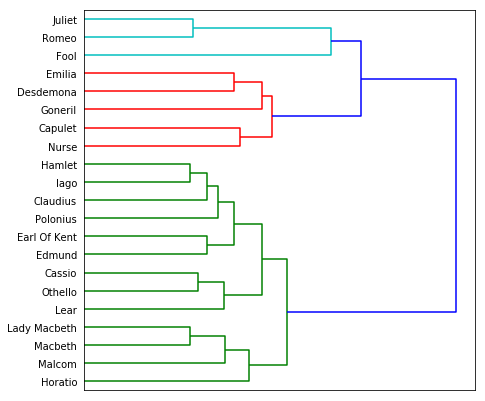

In [152]:
dendrogram_plotter(shakespeare_characters, euclidean_distances, 7, 10)

## All english characters together

In [117]:
all_characters = {**wilde_characters, **shaw_characters, **jonson_characters, **shakespeare_characters}

In [244]:
wilde_color = color_assigner(wilde_characters,'magenta')
shaw_color = color_assigner(shaw_characters, 'navy')
jonson_color = color_assigner(jonson_characters, 'lime' )
shakespeare_color = color_assigner(shakespeare_characters, 'goldenrod')

In [245]:
character_colors = {**wilde_color, **shaw_color, **jonson_color, **shakespeare_color}

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  import sys


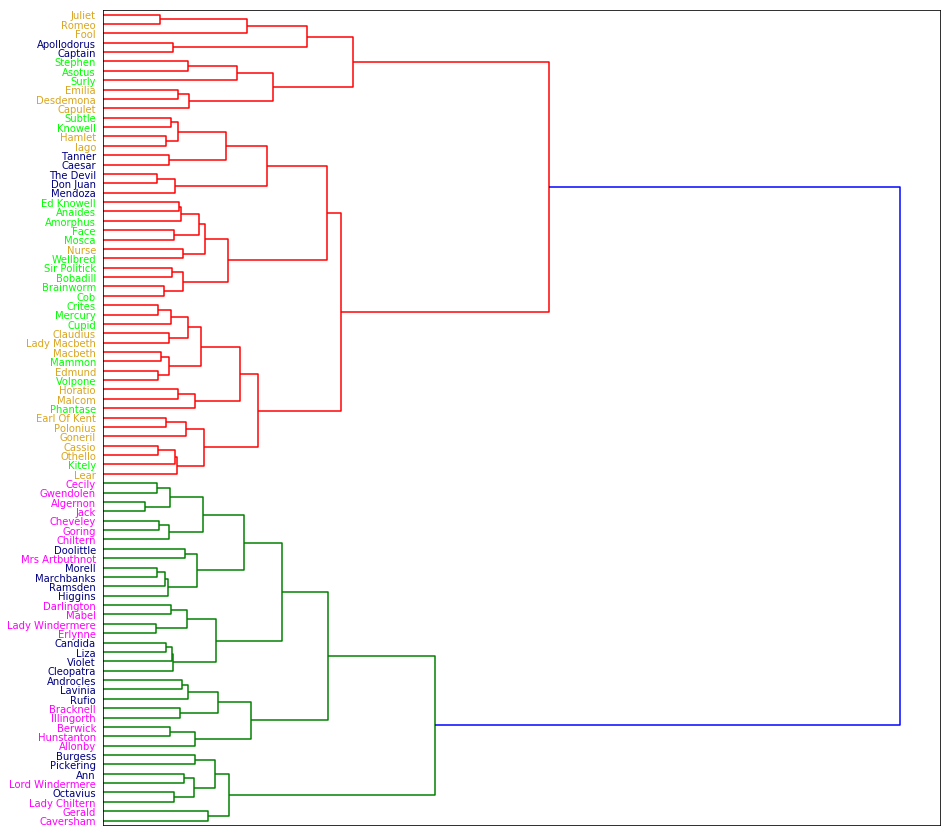

In [257]:
dendrogram_plotter_color(all_characters, euclidean_distances, 15, 10, character_colors)

# German Authors

## Friedrich Schiller

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  import sys


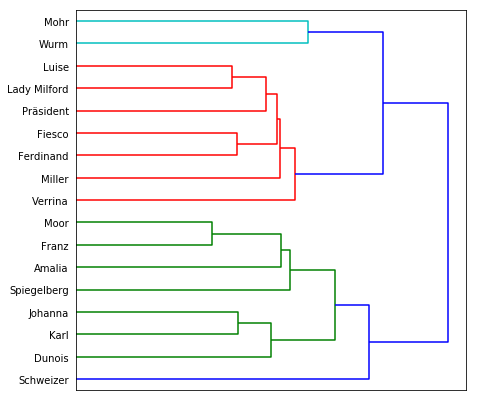

In [159]:
dendrogram_plotter(schiller_characters, euclidean_distances, 7, 10)

## Johann Wolfgang von Goethe

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  import sys


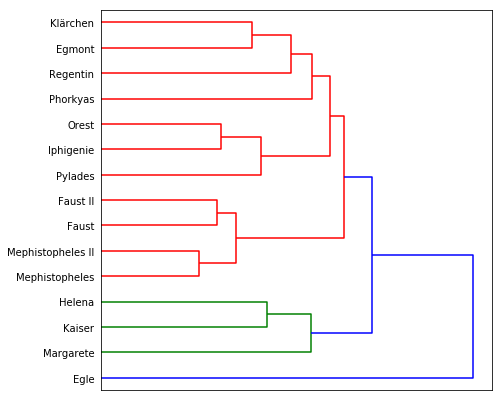

In [177]:
dendrogram_plotter(goethe_characters, euclidean_distances, 7, 10)

## All german characters together

In [222]:
all_german_characters = {**schiller_characters, **goethe_characters}

In [260]:
schiller_color = color_assigner(schiller_characters, 'magenta')
goethe_color = color_assigner(goethe_characters, 'navy')

In [261]:
german_character_colors = {**schiller_color, **goethe_color}

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  import sys


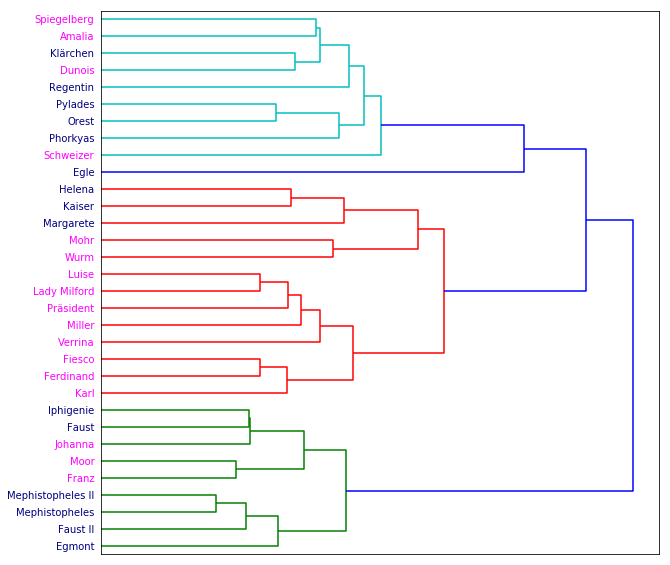

In [262]:
dendrogram_plotter_color(all_german_characters, euclidean_distances, 10, 10, german_character_colors)